# Intro to pytorch with linear regression models 

The objective in this homework is to get familiarity with the basic building blocks in pytorch 

In [27]:
import torch 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [28]:

def generate_poly_data(N, sigma):
    np.random.seed(100)
    x = np.random.uniform(low=-1, high=3, size=N)
    y = [2 * i ** 2 - 3 * i + 1 for i in x] 
    noise = np.random.normal(0, sigma, N)
    y = y + noise
    return x, y
    

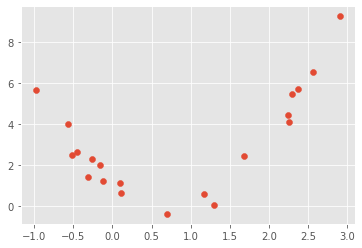

In [29]:
x, y = generate_poly_data(20, 0.5)
plt.scatter(x, y)
plt.show()

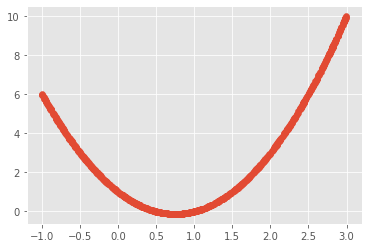

In [30]:
# Our test data 
x_test = np.random.uniform(low=-1, high=3, size = 1000)
y_test = np.array([2 * i ** 2 - 3 * i + 1 for i in x_test]) 
plt.scatter(x_test, y_test)
plt.show()

In [31]:
# We want y = wx + b

class LinearReg_module(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.regressionLayer = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        output = self.regressionLayer(x)
        return output 
        
        

In [32]:
# Linear regression

class pytorchLR():
    def __init__(self, 
                module,
                 n_epochs = 100,
                weight_decay = 0,
                lr = 10e-3):
        self.n_epochs = n_epochs
        self.weight_decay = weight_decay
        self.lr = lr
        self.module = module
        
    def fit(self, x, y):
        x = torch.tensor(x).float()
        y = torch.tensor(y).float()
        '''*** Define the loss ***
        '''
        criterion = nn.MSELoss()
        
        
        '''*** Define the optimizer SGD ***'''
        optimizer = torch.optim.SGD(self.module.parameters(), lr=self.lr, weight_decay=self.weight_decay)

        
        for epoch in range(self.n_epochs):
            '''
            For this homework you are not required to partition the data in mini batches 
            ***
            Complete the training routine passing x trhough the network, computing the loss, calling the backpropagation 
            and computing an step with the optimizer
            ***
            '''
            optimizer.zero_grad()
            out = self.module(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            
    def predict(self, x):
        self.module.eval()
        x = torch.tensor(x).float()
        y_hat = self.module(x)
        return y_hat.detach().cpu().numpy()
            

In [33]:
# Create the model and fit it. For now the model is y = mx + b
model = pytorchLR(LinearReg_module(1), n_epochs = 5000, weight_decay = 0, lr = 1e-3)
model.fit(x[:, None], y[:, None])

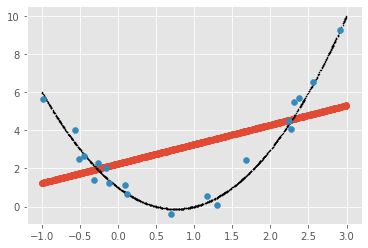

In [34]:
# Plot the predictions and the train data 
y_hat = model.predict(x_test[:, None])

def graph(x, y, x_test, y_test, y_hat):
    plt.scatter(x_test, y_hat)
    plt.scatter(x_test, y_test, c = "black", s = 1)
    plt.scatter(x, y)
    plt.show()

graph(x, y, x_test, y_test, y_hat)

In [35]:
# We known the true model is an 2nd order polynomial 
'''*** Create the data for the x and x**2, fit the model, and plot as above the training data and the predictions of the test data.
Then print the parameters of your regressionLayer or your model.module.
Did you obtain something close to the true parameters?
***'''

def poly(degree, x, y, x_test, y_test, lr=1e-3, weight_decay=0):
    px = np.array([np.power(x, i) for i in range(1, degree + 1)]).T
    py = np.array([y] * 5).T

    model = pytorchLR(
        LinearReg_module(degree), 
        n_epochs = 5000, 
        weight_decay=weight_decay, 
        lr=lr
    )
    model.fit(px[:, None], py[:, None])

    px_test = np.array([np.power(x_test, i) for i in range(1, degree + 1)]).T
    y_hat = model.predict(px_test)

    graph(x, y, x_test, y_test, y_hat)
    print(list(model.module.parameters()))
    return y_hat

poly(2, x, y, x_test, y_test)
''''''

/home/sean/.asdf/installs/python/3.10.0/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([20, 1, 5])) that is different to the input size (torch.Size([20, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


''

In [36]:
'''*** Create the data for a 5 degree polynomial and fit it. Should you get a better MSE than for the previous two models?.
hint: you might need to play with the learning rate until you obtain a good value
***'''

poly(5, x, y, x_test, y_test, 1e-4)
''''''

''

In [41]:
'''*** Create a for loop for different values of sigma = [0.1, 0.5, 1], and N = [15, 100]
use a 5 degree polynomial model with different values for regularization 
weight_decay = [0, 0.2, 0.5], compute the testing error 
***'''

for n in [15, 100]:
    for sigma in [0.1, 0.5, 1]:
        x, y = generate_poly_data(n, sigma)
        for decay in [0, 0.2, 0.5]:
            y_hat = poly(5, x, y, x_test, y_test, 1e-4, decay)
            mse = np.mean((y_hat - y_test)**2)
            print(f"sigma: {sigma:>3}, N: {n:>3}, weight decay: {decay:.1f}, mse: {mse:.4f}")



sigma: 0.1, N:  15, weight decay: 0.0, mse: 14.5104
sigma: 0.1, N:  15, weight decay: 0.2, mse: 13.1583
sigma: 0.1, N:  15, weight decay: 0.5, mse: 14.1570
sigma: 0.5, N:  15, weight decay: 0.0, mse: 13.6757
sigma: 0.5, N:  15, weight decay: 0.2, mse: 12.4385
sigma: 0.5, N:  15, weight decay: 0.5, mse: 12.9846
sigma:   1, N:  15, weight decay: 0.0, mse: 10.8108
sigma:   1, N:  15, weight decay: 0.2, mse: 11.8270
sigma:   1, N:  15, weight decay: 0.5, mse: 11.0780
sigma: 0.1, N: 100, weight decay: 0.0, mse: 13.2202
sigma: 0.1, N: 100, weight decay: 0.2, mse: 13.6684
sigma: 0.1, N: 100, weight decay: 0.5, mse: 13.7446
sigma: 0.5, N: 100, weight decay: 0.0, mse: 13.7502
sigma: 0.5, N: 100, weight decay: 0.2, mse: 13.0641
sigma: 0.5, N: 100, weight decay: 0.5, mse: 13.4640
sigma:   1, N: 100, weight decay: 0.0, mse: 13.5348
sigma:   1, N: 100, weight decay: 0.2, mse: 13.5143
sigma:   1, N: 100, weight decay: 0.5, mse: 13.2758
